https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

https://towardsdatascience.com/what-does-it-take-for-an-apartment-in-barcelona-to-be-a-survivor-10e0ad337672
https://opendata-ajuntament.barcelona.cat/data/en/dataset/est-mercat-immobiliari-lloguer-mitja-mensual
https://diegoquintanav.github.io/folium-barcelona-EN.html

https://opendata-ajuntament.barcelona.cat/data/en/dataset?res_format=SHP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

#df = pd.read_pickle('./stanovi/data.pkl')

df = pd.read_csv('./stanovi/data.csv')

In [2]:
print('\n\nInfo')
print(df.info())

print('\n\nNull Elements')
print(df.isnull().sum())



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3696 non-null   int64  
 1   propertyCode            3696 non-null   int64  
 2   thumbnail               3630 non-null   object 
 3   externalReference       3269 non-null   object 
 4   numPhotos               3696 non-null   int64  
 5   floor                   3395 non-null   object 
 6   price                   3696 non-null   float64
 7   propertyType            3696 non-null   object 
 8   operation               3696 non-null   object 
 9   size                    3696 non-null   float64
 10  exterior                3696 non-null   bool   
 11  rooms                   3696 non-null   int64  
 12  bathrooms               3696 non-null   int64  
 13  address                 3696 non-null   object 
 14  province                3696 non-

In [3]:

df = df.drop(columns=['index', 'thumbnail', 'externalReference', 'numPhotos', 'province', 'country', 'showAddress', 'url', 'hasVideo', 'hasPlan', 'has3DTour', 'has360'])
df.propertyCode = df.propertyCode.astype(int)
#df.set_index('propertyCode', inplace = True)
df.drop(index = df.index[df['size'] > 10000], inplace = True)
df.reset_index(drop=True, inplace=True)
df.head(5)

propertyCode floor     price propertyType operation  size  exterior  rooms  \
0      87688139     3  172000.0         flat      sale  67.0     False      2   
1      89127122     2  130000.0         flat      sale  32.0      True      1   
2      89115559     1  149000.0         flat      sale  45.0     False      2   
3      89102591     5  220000.0         flat      sale  54.0      True      2   
4      89123676    bj  103000.0         flat      sale  67.0     False      2   

   bathrooms                    address municipality      district  \
0          2     Calle de Provença, 127    Barcelona      Eixample   
1          1            barrio El Raval    Barcelona  Ciutat Vella   
2          1    Calle d'Arnau d'Oms, 44    Barcelona    Nou Barris   
3          1  barrio La Sagrada Família    Barcelona      Eixample   
4          1        Calle de Travau, 29    Barcelona    Nou Barris   

                        neighborhood   latitude  longitude  distance  \
0    L'Antiga Esquerra de l'Eixample  41.387739   2.151873      1154   
1                           El Raval  41.380189   2.165333       880   
2                              Porta  41.430582   2.177449      4824   
3                 La Sagrada Família  41.410451   2.178700      2711   
4  Can Peguera - El Turó de la Peira  41.432788   2.169198      4977   

   newDevelopment  priceByArea          detailedType  \
0           False       2567.0  {'typology': 'flat'}   
1           False       4063.0  {'typology': 'flat'}   
2           False       3311.0  {'typology': 'flat'}   
3           False       4074.0  {'typology': 'flat'}   
4           False       1537.0  {'typology': 'flat'}   

                                      suggestedTexts status hasLift  \
0  {'subtitle': "L'Antiga Esquerra de l'Eixample,...    NaN     NaN   
1  {'subtitle': 'El Raval, Barcelona', 'title': '...   good   False   
2  {'subtitle': 'Porta, Barcelona', 'title': "Pis...   good    True   
3  {'subtitle': 'La Sagrada Família, Barcelona', ...   good    True   
4  {'subtitle': 'Can Peguera - El Turó de la Peir...  renew    True   

  parkingSpace newDevelopmentFinished  Week topNewDevelopment  
0          NaN                    NaN    14               NaN  
1          NaN                    NaN    14               NaN  
2          NaN                    NaN    14               NaN  
3          NaN                    NaN    14               NaN  
4          NaN                    NaN    14               NaN

# Impute missing district and neighborhood based on kNN and geolocation 

In [4]:
print('\n\n There are '+ repr(df.district.isnull().sum()) +' Null Elements in district')

index_missing = df.index[df.district.isnull()]

X = df.dropna(subset=['district']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['district']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'district'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 78 Null Elements in district


In [5]:
print('\n\n There are '+ repr(df.neighborhood.isnull().sum()) +' Null Elements in neighborhood')

index_missing = df.index[df.neighborhood.isnull()]

X = df.dropna(subset=['neighborhood']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['neighborhood']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'neighborhood'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 82 Null Elements in neighborhood


# Remove Outliers

In [6]:
df.describe()

propertyCode          price         size        rooms    bathrooms  \
count  3.695000e+03    3695.000000  3695.000000  3695.000000  3695.000000   
mean   8.894799e+07  237177.423004    73.480271     2.589716     1.210284   
std    3.120961e+06   88186.042572    22.725141     0.926072     0.419996   
min    7.938120e+05   12900.000000    11.000000     0.000000     0.000000   
25%    8.914181e+07  165000.000000    60.000000     2.000000     1.000000   
50%    8.923424e+07  225000.000000    72.000000     3.000000     1.000000   
75%    8.929176e+07  310000.000000    85.000000     3.000000     1.000000   
max    8.939812e+07  400000.000000   291.000000     6.000000     3.000000   

          latitude    longitude     distance   priceByArea         Week  
count  3695.000000  3695.000000  3695.000000   3695.000000  3695.000000  
mean     41.395054     2.160295  3465.751827   3296.835995    17.535047  
std       0.023825     0.031348  1624.611126   1114.777983     2.039885  
min      41.348364     2.083150   285.000000    817.000000    14.000000  
25%      41.373767     2.137339  2054.500000   2504.000000    16.000000  
50%      41.392164     2.166955  3488.000000   3212.000000    18.000000  
75%      41.415753     2.182488  4782.000000   3922.000000    19.000000  
max      41.449221     2.227291  6990.000000  20818.000000    20.000000

In [7]:
# Remove outliers
df.drop(index = df.index[df['size'] > 150], inplace = True)
df.drop(index = df.index[df['priceByArea'] > 6000], inplace = True)
df.reset_index(drop=True, inplace=True)




# Analyze property types

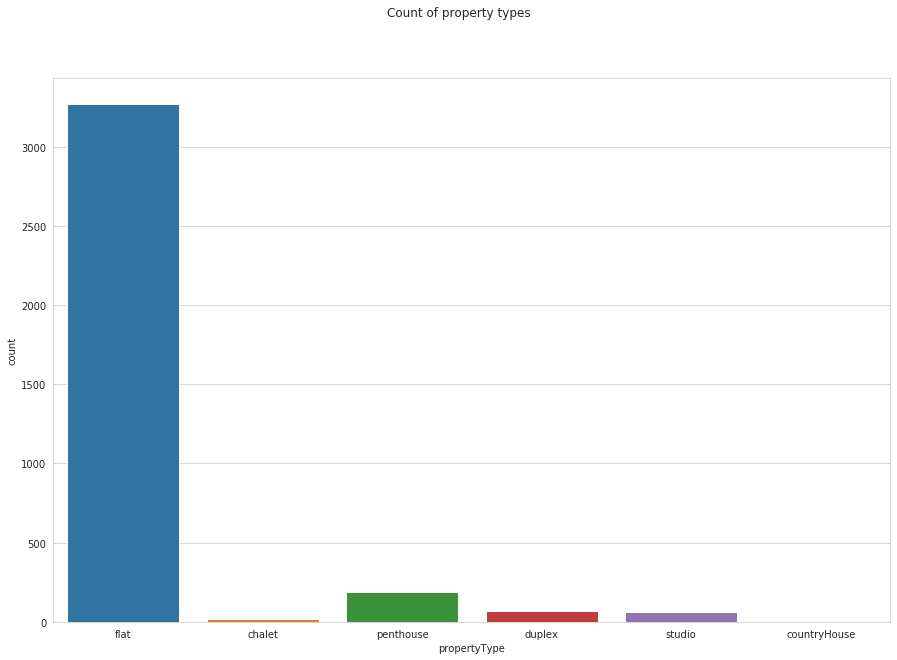

In [8]:
fig_size = (15,10)
fig, ax = plt.subplots(1,figsize=fig_size)
sns.countplot(x="propertyType", data=df, ax = ax);
fig.suptitle('Count of property types');

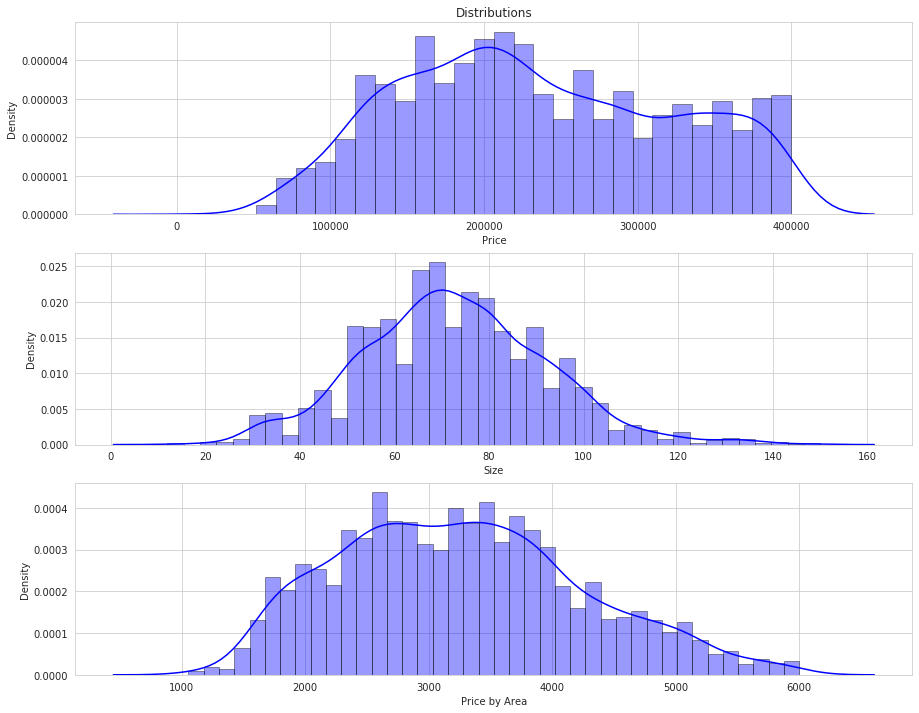

In [9]:
# Prices over 400k are exluded when requesting info from idealista
fig_size = (15,12)
fig, ax = plt.subplots(3,figsize=fig_size)

sns.distplot(df['price'], hist=True, kde=True, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'}, ax = ax[0])
# Add labels
ax[0].set_title('Distributions');
ax[0].set_xlabel('Price');
ax[0].set_ylabel('Density');


sns.distplot(df['size'], hist=True, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'}, ax = ax[1])
# Add labels
ax[1].set_xlabel('Size');
ax[1].set_ylabel('Density');


sns.distplot(df['priceByArea'], hist=True, kde=True, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'}, ax = ax[2])
# Add labels
ax[2].set_xlabel('Price by Area');
ax[2].set_ylabel('Density');





/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


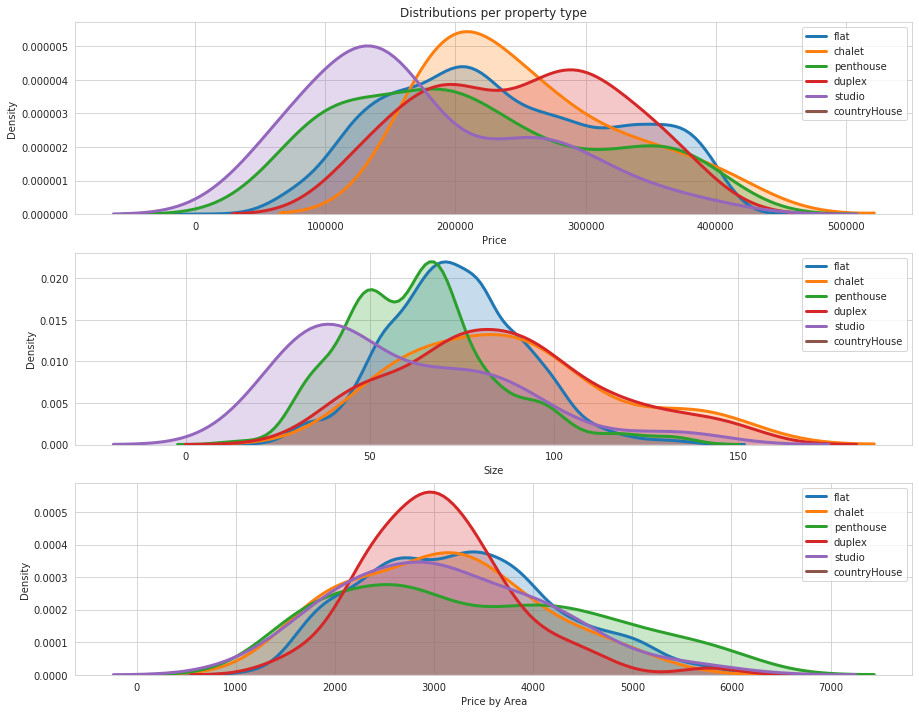

In [10]:
fig_size = (15,12)
fig, ax = plt.subplots(3,figsize=fig_size)

for typeOfProperty in df.propertyType.unique():
    dfDist = df.loc[df['propertyType']==typeOfProperty, ['price', 'size', 'priceByArea']]
    
    sns.distplot(dfDist['price'], hist=False, kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3},
                 label = typeOfProperty, ax = ax[0])
    
    sns.distplot(dfDist['size'], hist=False, kde=True,
             kde_kws = {'shade': True, 'linewidth': 3},
                 label = typeOfProperty, ax = ax[1])
    
    sns.distplot(dfDist['priceByArea'], hist=False, kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3},
                 label = typeOfProperty, ax = ax[2])
    
# Add labels
ax[0].set_title('Distributions per property type');
ax[0].set_xlabel('Price');
ax[0].set_ylabel('Density');

ax[1].set_xlabel('Size');
ax[1].set_ylabel('Density');

ax[2].set_xlabel('Price by Area');
ax[2].set_ylabel('Density');
    
    

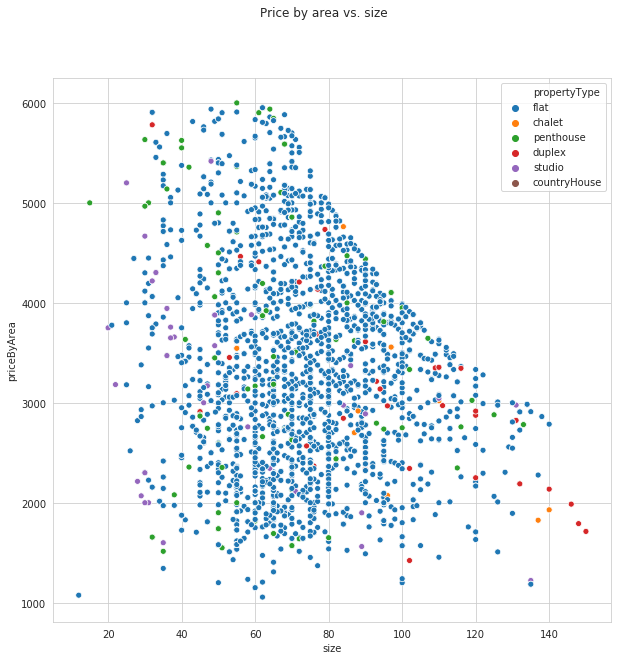

In [11]:
fig_size = (10,10)
fig, ax = plt.subplots(figsize=fig_size)
sns.scatterplot(y='priceByArea', x='size', hue='propertyType', data=df, ax=ax)
fig.suptitle('Price by area vs. size');


# Number of rooms

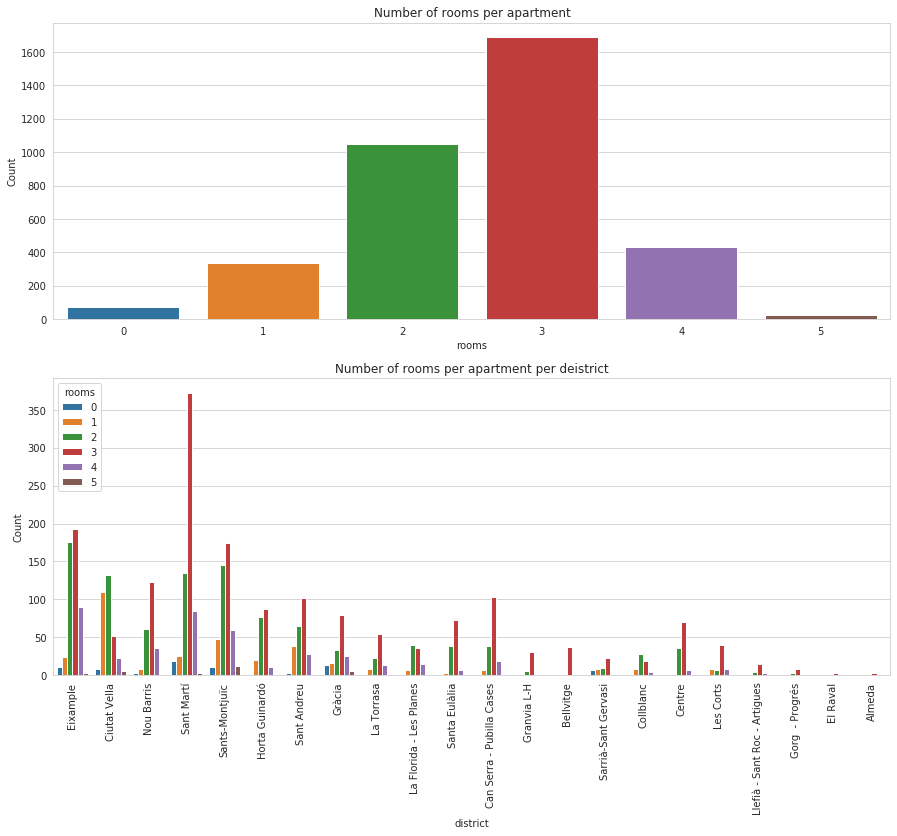

In [12]:
sns.set_style("whitegrid")
fig_size = (15,12)
fig, ax = plt.subplots(2, figsize=fig_size)

sns.countplot(x='rooms', orient = 0, data = df, ax = ax[0])
ax[0].set_title('Number of rooms per apartment');
ax[0].set_ylabel('Count');

sns.countplot(x = 'district', hue = 'rooms', orient = 0, data = df, ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90);
ax[1].set_title('Number of rooms per apartment per deistrict');
ax[1].set_ylabel('Count');


# Analyze the relationship of floor and price

### Clean floors and assign corresponding numerical values to floorSort 

In [13]:
df['floor'] = df['floor'].astype(str)
df['floorSort'] = df.floor
df['floorSort'].replace('en', str(0), inplace= True) # entreplanta = 0
df['floorSort'].replace('bj', str(-1), inplace= True) # bajo = -1
df['floorSort'].replace('ss', str(-1), inplace= True) # semisotano = -1
df['floorSort'].replace('st', str(-1), inplace= True) # semisotano = -1
df['floorSort'].replace('nan', str(-2), inplace= True) # nan = -2
df['floorSort'].replace('Unknown', str(-1), inplace= True) # Set unknown to -2

df.floorSort = df.floorSort.apply(pd.to_numeric)

df.loc[df['propertyType'] == 'penthouse', 'floor'] =  'Penthouse'# Set unknown to -2
df.loc[df['propertyType'] == 'penthouse', 'floorSort'] =  df.floorSort.max() + 1# Set unknown to -2


### Counts and price distribution per floor

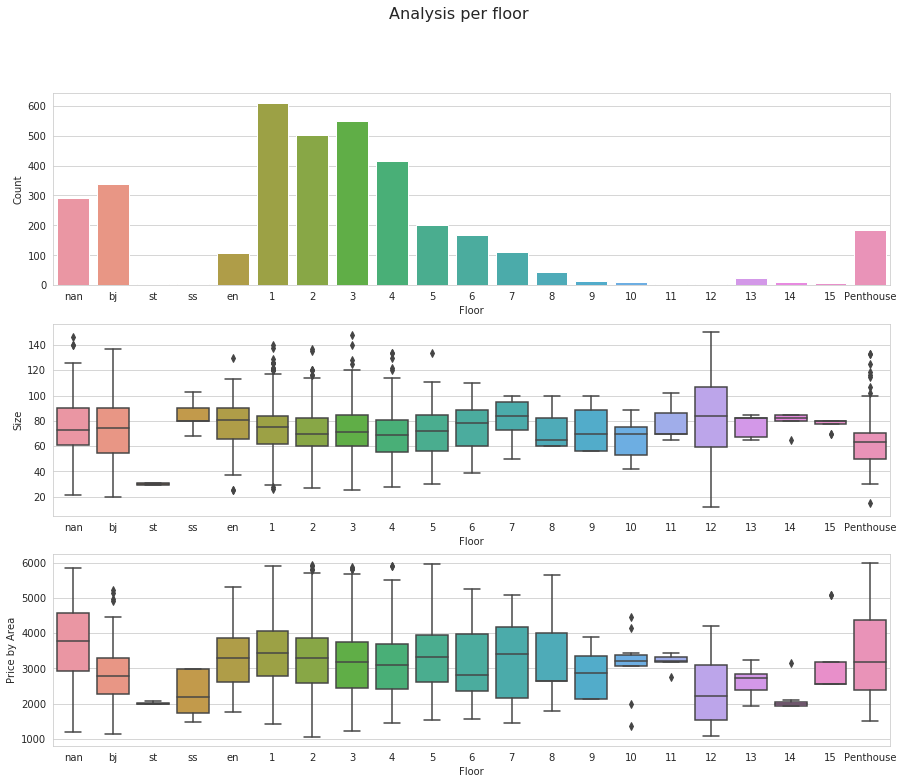

In [14]:
fig_size = (15,12)
fig, ax = plt.subplots(3, figsize=fig_size)
fig.suptitle('Analysis per floor', fontsize=16)
sns.countplot(x='floor', data=df.sort_values(by=['floorSort']), orient = 'v', ax=ax[0])
ax[0].set_xlabel('Floor');
ax[0].set_ylabel('Count');

sns.boxplot(x='floor', y='size', data=df.sort_values(by=['floorSort']), ax = ax[1])
ax[1].set_xlabel('Floor');
ax[1].set_ylabel('Size');

sns.boxplot(x='floor', y='priceByArea', data=df.sort_values(by=['floorSort']), ax = ax[2])
ax[2].set_xlabel('Floor');
ax[2].set_ylabel('Price by Area');


### Analyze Penthouses

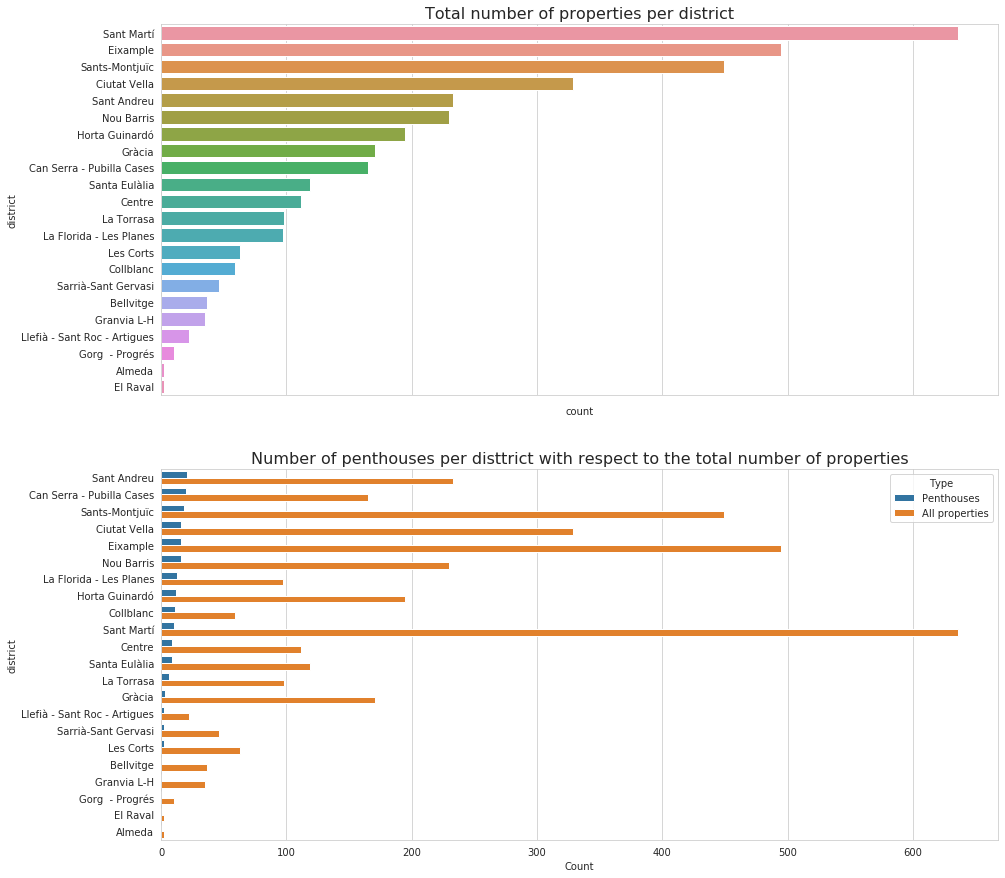

In [15]:
def get_penthouse(x):
    return x.loc[x == 'penthouse'].count()


def get_all(x):
    return x.count()


# All flats
fig, ax = plt.subplots(2, figsize=(15, 15))
sns.countplot(y='district', data=df,
              order=df.district.value_counts().index, orient='v', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,
                   horizontalalignment='right')
ax[0].set_title(
    'Total number of properties per district', fontsize=16);

# Penthouses
aux = df[['district', 'propertyType']].groupby(['district']).agg(
    [get_penthouse, get_all])
aux.columns = ['Penthouses', 'All properties']
plot_index = aux.sort_values('Penthouses', ascending=False).index

aux = aux.sort_values(['Penthouses']).reset_index()
aux = aux.reset_index().melt(id_vars='district', value_vars=['Penthouses', 'All properties'],
                             var_name='Type', value_name='Count')

sns.barplot(y="district", x="Count", hue="Type", data=aux,
            order=plot_index, ax=ax[1])
ax[1].set_title(
    'Number of penthouses per disttrict with respect to the total number of properties', fontsize=16);

# Location

/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


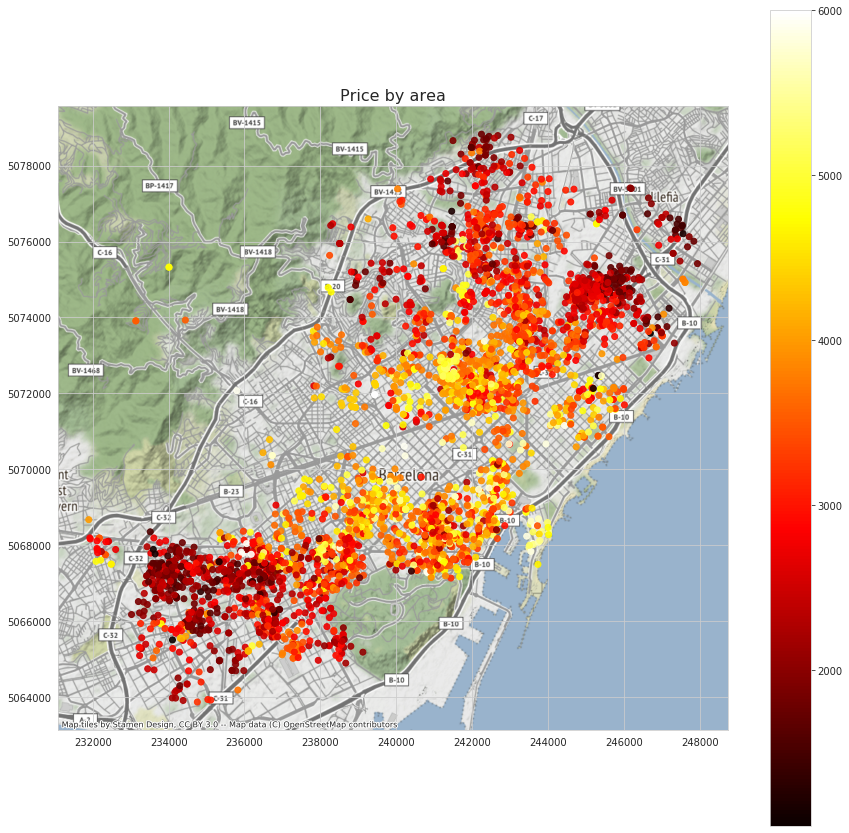

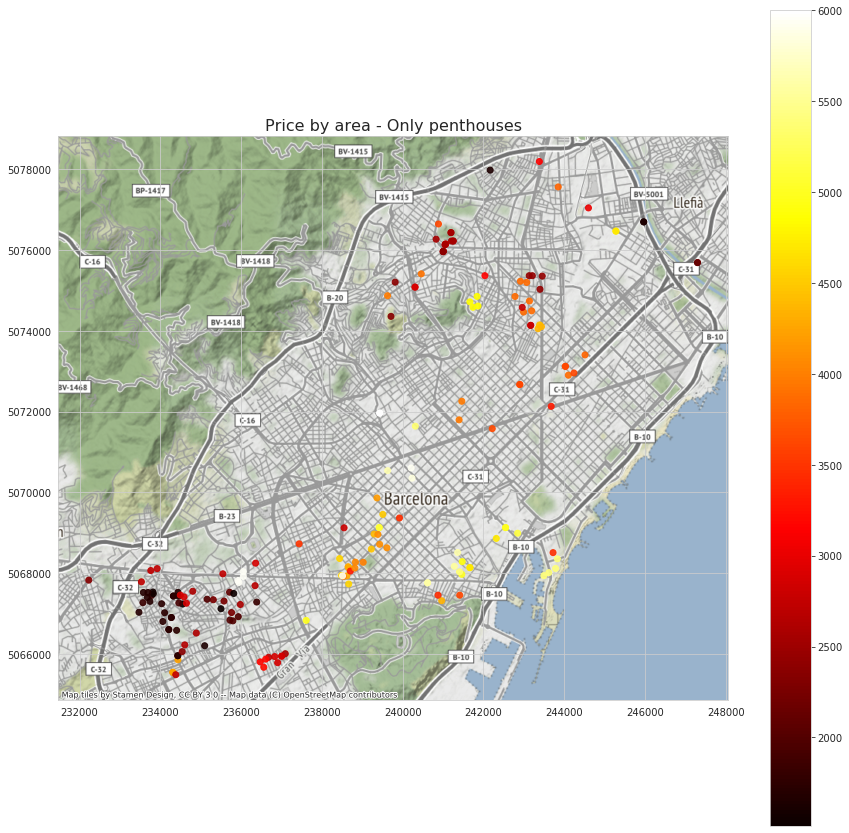

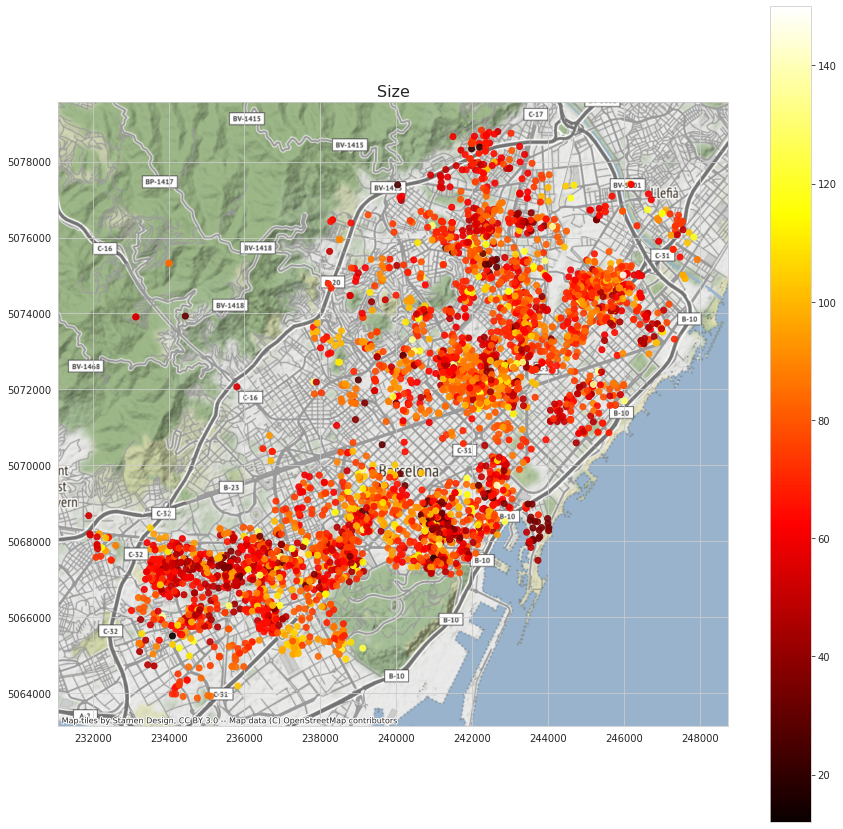

In [16]:
import geopandas as gpd
import descartes
import contextily as ctx


gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = {'init': 'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)

figsize = (15,15)
fig, ax = plt.subplots(1, figsize=figsize)
gdf.plot(column='priceByArea', cmap='hot',  legend=True, alpha=0.9, ax=ax)
ctx.add_basemap(ax)
ax.set_title("Price by area", fontsize=16);

fig, ax = plt.subplots(1, figsize=figsize)
gdf.loc[gdf['propertyType'] == 'penthouse'].plot(
    column='priceByArea', cmap='hot', legend=True, alpha=0.9, ax=ax)
ctx.add_basemap(ax)
ax.set_title("Price by area - Only penthouses", fontsize=16);

fig, ax = plt.subplots(1, figsize=figsize)
gdf.plot(column='size', cmap='hot', legend=True, alpha=0.9, ax=ax)
ctx.add_basemap(ax)
ax.set_title("Size", fontsize=16);

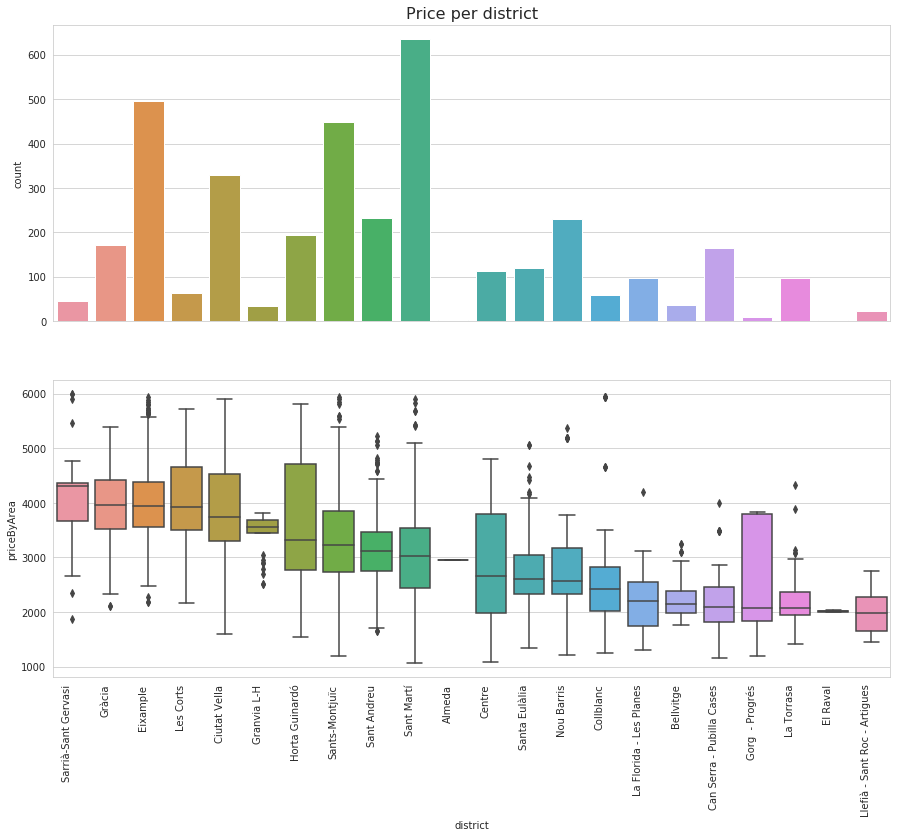

In [17]:
fig_size = (15, 12)
fig, ax = plt.subplots(2, figsize=fig_size)
order = df.district.loc[df.floor == 'Penthouse'].value_counts().index

sns.countplot(x='district', data=df,
              order=df.groupby('district')['priceByArea'].median().sort_values(ascending=False).index, orient='v', ax=ax[0])
ax[0].set_xticks([])
ax[0].set_xlabel(None)
ax[0].set_title(
    'Total number of properties per district', fontsize=16);

sns.boxplot(y='priceByArea', x='district', data=df, ax=ax[1],
            order=df.groupby('district')['priceByArea'].median().sort_values(ascending=False).index)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,
                      horizontalalignment='right')
ax[0].set_title(
    'Price per district', fontsize=16);

### Change in price over time

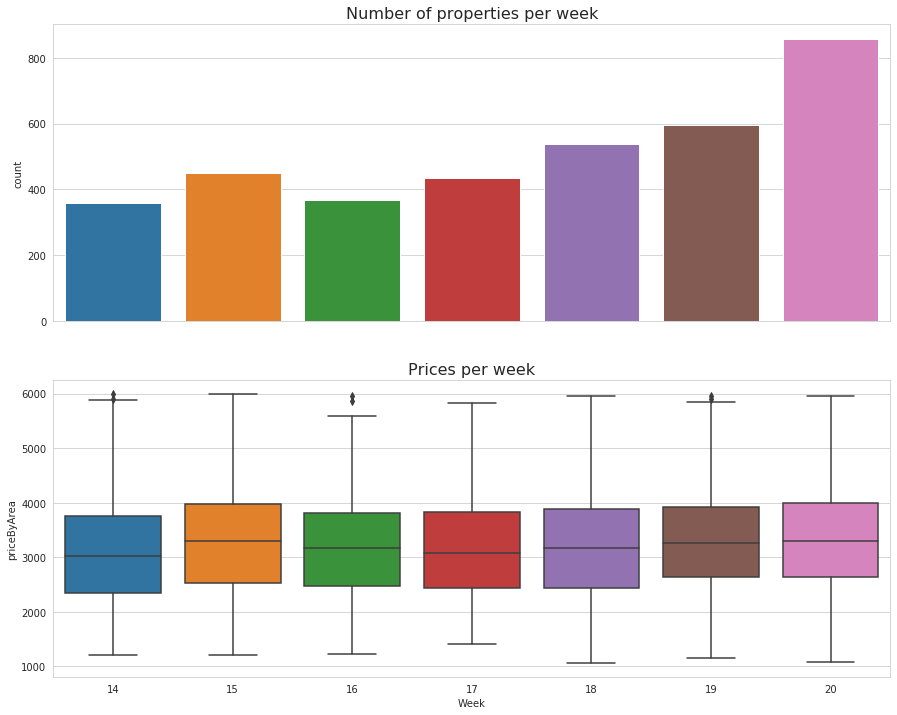

In [18]:
fig_size = (15, 12)
fig, ax = plt.subplots(2, figsize=fig_size)
order = df.district.loc[df.floor == 'Penthouse'].value_counts().index

sns.countplot(x='Week', data=df, ax=ax[0])
ax[0].set_xticks([])
ax[0].set_xlabel(None)
ax[0].set_title(
    'Number of properties per week', fontsize=16);

sns.boxplot(x='Week', y='priceByArea', data=df, ax=ax[1])
ax[1].set_title(
    'Prices per week', fontsize=16);

# Analysis of new apartments

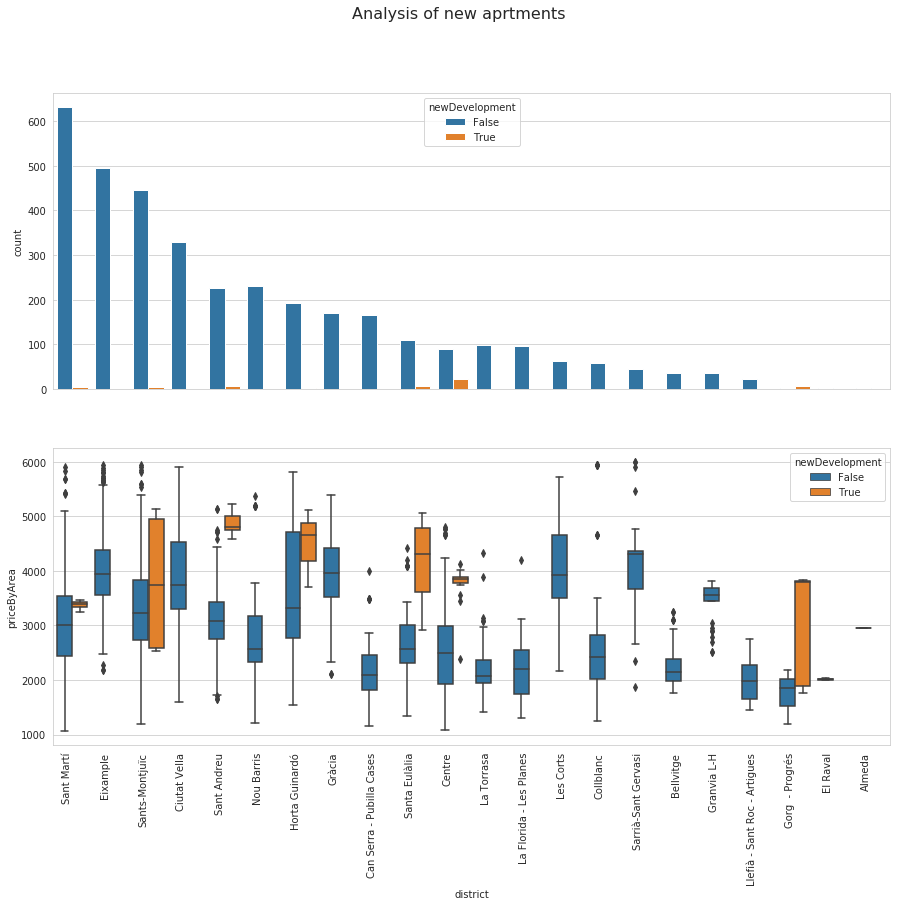

In [19]:
fig_size = (15, 12)
fig, ax = plt.subplots(2, figsize=fig_size)
sns.countplot(x='district', hue='newDevelopment', data=df, ax=ax[0],
             order=df.groupby('district')['newDevelopment'].count().sort_values(ascending=False).index);
ax[0].set_xticks([]);
ax[0].set_xlabel(None);

sns.boxplot(x='district', y='priceByArea', hue='newDevelopment',data=df,ax=ax[1],
           order=df.groupby('district')['newDevelopment'].count().sort_values(ascending=False).index);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,
                      horizontalalignment='right');
fig.suptitle('Analysis of new aprtments', fontsize=16);

# Analysis of elevator

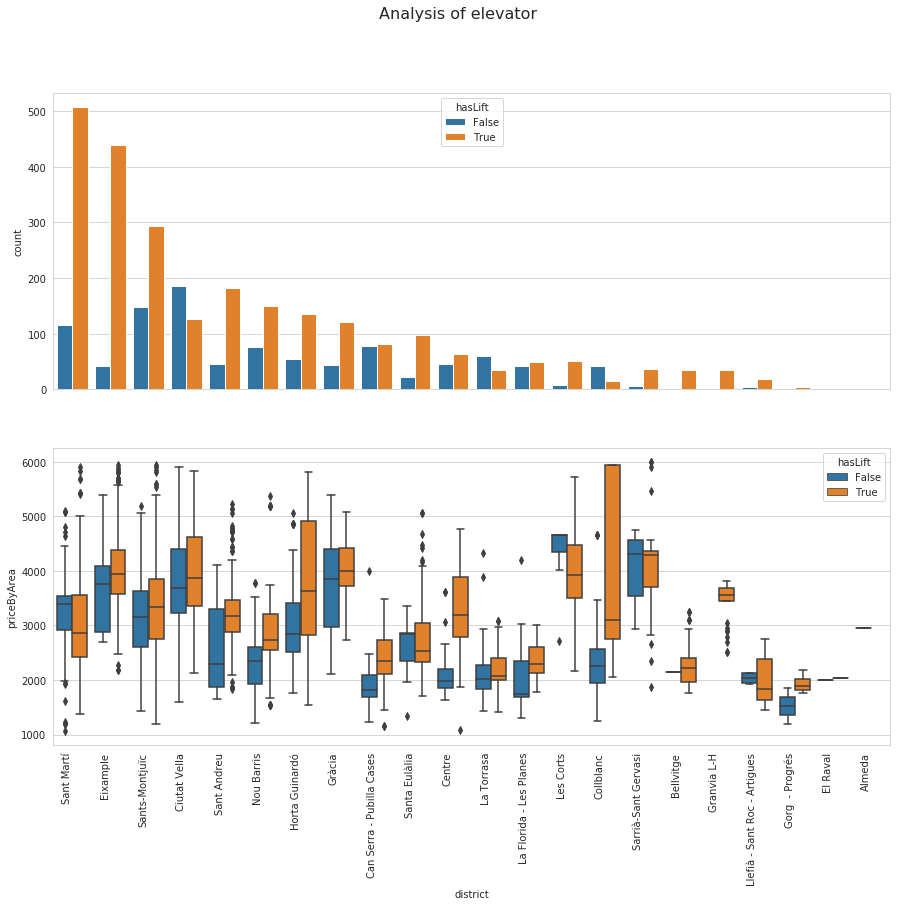

In [20]:
fig_size = (15, 12)
fig, ax = plt.subplots(2, figsize=fig_size)
sns.countplot(x='district', hue='hasLift', data=df, ax=ax[0],
             order=df.groupby('district')['hasLift'].count().sort_values(ascending=False).index);
ax[0].set_xticks([]);
ax[0].set_xlabel(None);

sns.boxplot(x='district', y='priceByArea', hue='hasLift',data=df,ax=ax[1],
           order=df.groupby('district')['hasLift'].count().sort_values(ascending=False).index);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,
                      horizontalalignment='right');
fig.suptitle('Analysis of elevator', fontsize=16);

# Exterior/interior

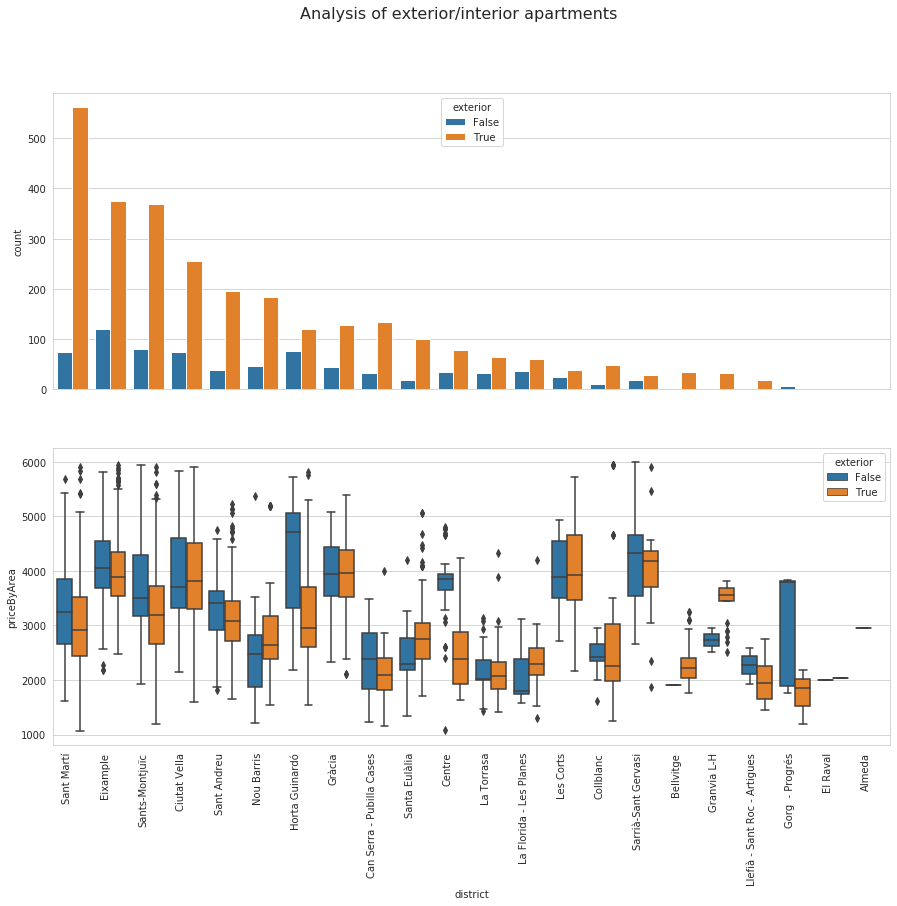

In [21]:
fig_size = (15, 12)
fig, ax = plt.subplots(2, figsize=fig_size)
sns.countplot(x='district', hue='exterior', data=df, ax=ax[0],
             order=df.groupby('district')['exterior'].count().sort_values(ascending=False).index);
ax[0].set_xticks([]);
ax[0].set_xlabel(None);

sns.boxplot(x='district', y='priceByArea', hue='exterior',data=df,ax=ax[1],
           order=df.groupby('district')['exterior'].count().sort_values(ascending=False).index);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,
                      horizontalalignment='right');
fig.suptitle('Analysis of exterior/interior apartments', fontsize=16);

# Prediction

In [22]:
for i in df.columns:
    print (i)

propertyCode
floor
price
propertyType
operation
size
exterior
rooms
bathrooms
address
municipality
district
neighborhood
latitude
longitude
distance
newDevelopment
priceByArea
detailedType
suggestedTexts
status
hasLift
parkingSpace
newDevelopmentFinished
Week
topNewDevelopment
floorSort
geometry


In [23]:
df_model = df.drop(['geometry', 'price', 'parkingSpace', 'Week', 'newDevelopmentFinished',
                  'topNewDevelopment','status','suggestedTexts','detailedType','distance','neighborhood',
                   'district','municipality','address','operation','propertyCode','floor'],axis=1)

# drop NaNs
numberOfNans = df_model.isnull().sum().sum()/df_model.shape[0]
assert numberOfNans<0.05, "Oh no! The number of NaNs is " + str(numberOfNans)
df_model = df_model.dropna().reset_index(drop=True)
df_model['hasLift'] = df_model['hasLift'].astype('bool')

# get 0/1 for bool varibales
df_model["exterior"] = df_model["exterior"].astype(int)
df_model["newDevelopment"] = df_model["newDevelopment"].astype(int)
df_model["hasLift"] = df_model["hasLift"].astype(int)

# get dummies for categorical variables
df_model = pd.get_dummies(df_model)
df_model.head()

size  exterior  rooms  bathrooms   latitude  longitude  newDevelopment  \
0  32.0         1      1          1  41.380189   2.165333               0   
1  45.0         0      2          1  41.430582   2.177449               0   
2  54.0         1      2          1  41.410451   2.178700               0   
3  67.0         0      2          1  41.432788   2.169198               0   
4  76.0         1      3          1  41.423882   2.209126               0   

   priceByArea  hasLift  floorSort  propertyType_duplex  propertyType_flat  \
0       4063.0        0          2                    0                  1   
1       3311.0        1          1                    0                  1   
2       4074.0        1          5                    0                  1   
3       1537.0        1         -1                    0                  1   
4       1842.0        1          2                    0                  1   

   propertyType_penthouse  propertyType_studio  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0

The mean squared error (MSE) on train set: 722554.0952
The mean squared error (MSE) on test set: 711548.3178

The R square (R2) on train set: 0.2472
The R square (R2) on test set: 0.2635


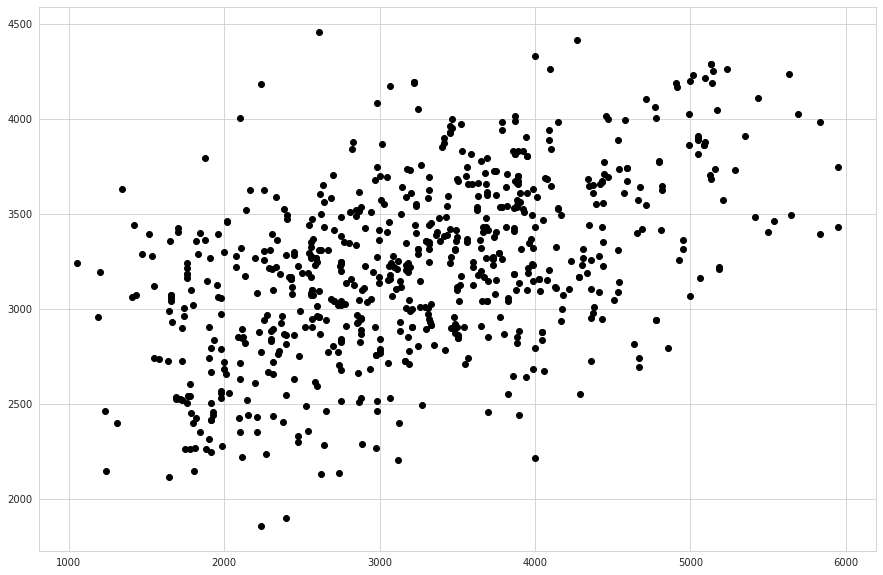

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

reg = LinearRegression()

labels = df_model['priceByArea']
train1 = df_model.drop(['priceByArea'],axis=1)
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.2,random_state =2)

reg.fit(x_train,y_train)
reg.score(x_test,y_test)

mse_train = mean_squared_error(y_train, reg.predict(x_train))
mse_test = mean_squared_error(y_test, reg.predict(x_test))
R2_train = reg.score(x_train,y_train)
R2_test = reg.score(x_test,y_test)
print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_test))
print("\nThe R square (R2) on train set: {:.4f}".format(R2_train))
print("The R square (R2) on test set: {:.4f}".format(R2_test))
fig,ax= plt.subplots(1,figsize=(15, 10))
plt.scatter(y_test, reg.predict(x_test),  color='black')
#plt.plot(x_test, y_test, color='blue', linewidth=3)




The mean squared error (MSE) on train set: 522.5465
The mean squared error (MSE) on test set: 203318.0133

The R square (R2) on train set: 0.9995
The R square (R2) on test set: 0.7896


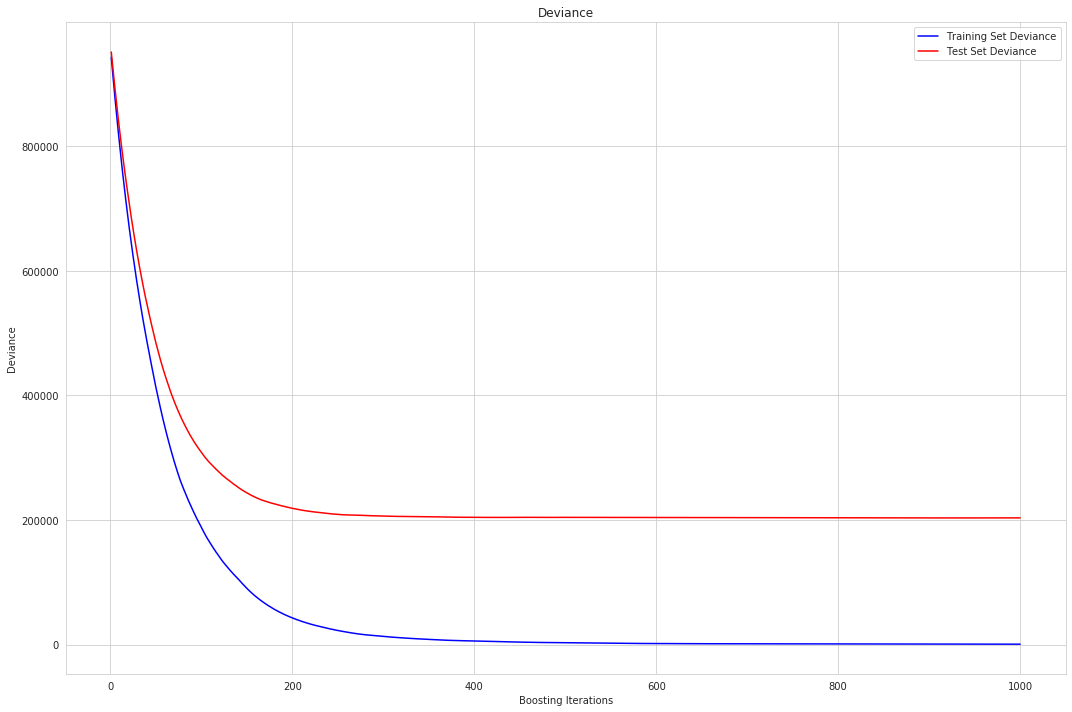

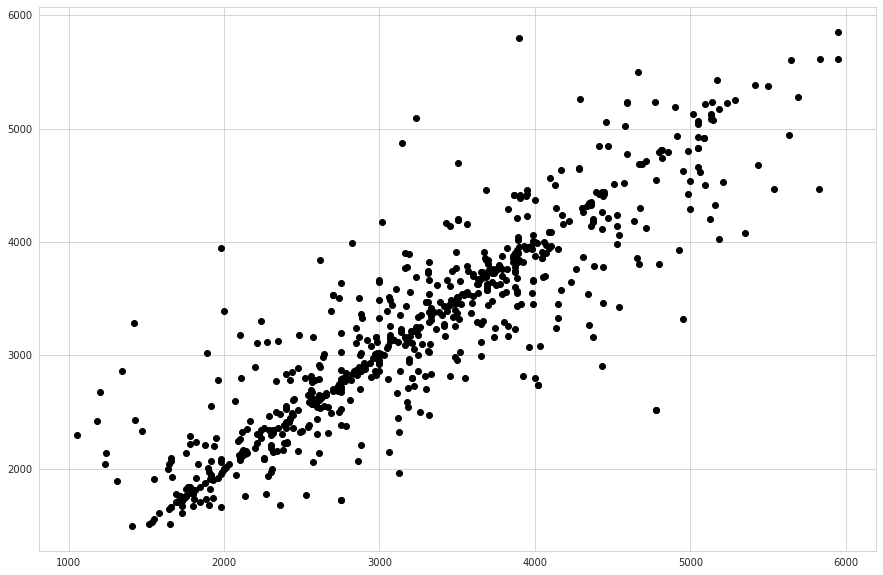

In [25]:

params = {'n_estimators': 1000,
          'max_depth': 12,
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse_train = mean_squared_error(y_train, reg.predict(x_train))
mse_test = mean_squared_error(y_test, reg.predict(x_test))
R2_train = reg.score(x_train,y_train)
R2_test = reg.score(x_test,y_test)
print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_test))
print("\nThe R square (R2) on train set: {:.4f}".format(R2_train))
print("The R square (R2) on test set: {:.4f}".format(R2_test))

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig,ax= plt.subplots(1,figsize=(15, 10))
plt.title('Deviance')
ax.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
        label='Training Set Deviance')
ax.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
ax.legend(loc='upper right')
ax.set_xlabel('Boosting Iterations')
ax.set_ylabel('Deviance')
fig.tight_layout()

fig,ax= plt.subplots(1,figsize=(15, 10))
plt.scatter(y_test, reg.predict(x_test),  color='black')







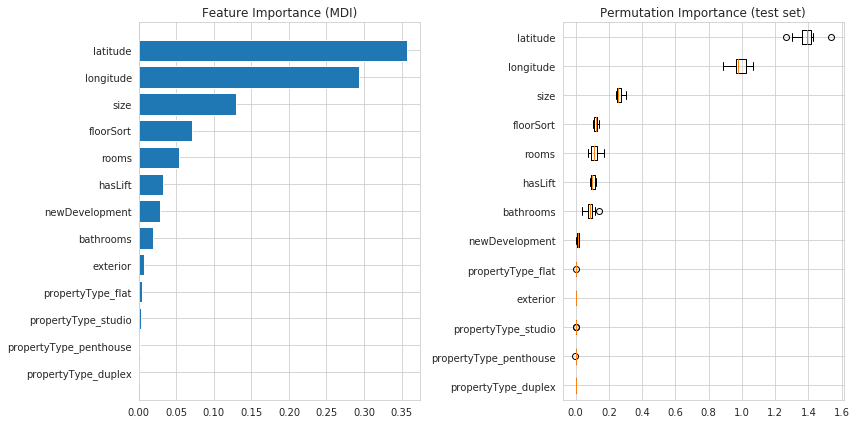

In [26]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(train1.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, x_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(train1.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

# Use all samples for modeling and find the best offers in terms of Price by Area

The mean squared error (MSE) on train set: 17369.1220
The R square (R2) on train set: 0.9819


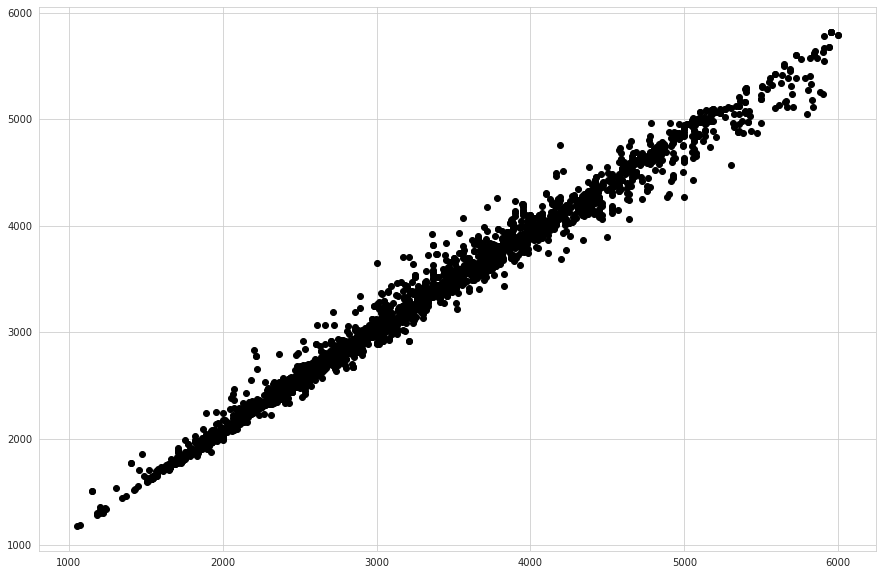

In [27]:
df_model = df.drop(['geometry', 'price', 'parkingSpace', 'Week', 'newDevelopmentFinished',
                  'topNewDevelopment','status','suggestedTexts','detailedType','distance','neighborhood',
                   'district','municipality','address','operation','propertyCode','floor'],axis=1)


# drop NaNs
numberOfNans = df_model.isnull().sum().sum()/df_model.shape[0]
assert numberOfNans<0.05, "Oh no! The number of NaNs is " + str(numberOfNans)
df_model = df_model.dropna()
df_model['hasLift'] = df_model['hasLift'].astype('bool')

# get 0/1 for bool varibales
df_model["exterior"] = df_model["exterior"].astype(int)
df_model["newDevelopment"] = df_model["newDevelopment"].astype(int)
df_model["hasLift"] = df_model["hasLift"].astype(int)

# get dummies for categorical variables
df_model = pd.get_dummies(df_model)


params = {'n_estimators': 300,
          'max_depth': 12,
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(df_model.drop(['priceByArea'],axis=1), df_model['priceByArea'])

mse_train = mean_squared_error(df_model['priceByArea'], reg.predict(df_model.drop(['priceByArea'],axis=1)))
R2_train = reg.score(df_model.drop(['priceByArea'],axis=1),df_model['priceByArea'])
print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The R square (R2) on train set: {:.4f}".format(R2_train))

fig,ax= plt.subplots(1,figsize=(15, 10))
plt.scatter(df_model['priceByArea'], reg.predict(df_model.drop(['priceByArea'],axis=1)),  color='black')

In [28]:
df_model['predictedPrice'] = reg.predict(df_model.drop(['priceByArea'],axis=1))
# Price difference = PredictedPrice- priceByArea ==> the higher numbers are better investment
df_model['priceDifference'] = df_model['predictedPrice']-df_model['priceByArea']

df=df.join(df_model[['predictedPrice', 'priceDifference']])
df['savings'] = df['size']*df['priceDifference']

In [29]:

# show only the properties cheaper by threashold from predicted price 
saving_threashold = 10000
df=df.loc[df['savings'] > saving_threashold]

df.sort_values(by='priceDifference',ascending=False).head(50)

propertyCode floor     price propertyType operation   size  exterior  \
2646      89289787     2  210000.0         flat      sale   70.0      True   
3201      89379604     1  139000.0         flat      sale   63.0      True   
938       89205456     1  285000.0         flat      sale   68.0      True   
3544      89387066     4  195000.0         flat      sale   58.0      True   
1344      89237185     2  122000.0         flat      sale   55.0      True   
1993      89237185     2  122000.0         flat      sale   55.0      True   
2155      89290925     2  165000.0         flat      sale   52.0      True   
917       89207683     5  210000.0         flat      sale   59.0     False   
199       89117433     1  167000.0         flat      sale   52.0      True   
1975      87551598     6  189000.0         flat      sale   50.0      True   
2786      89390655     6  190000.0         flat      sale   70.0     False   
469       89127340     3  249000.0         flat      sale   67.0      True   
2111      89252164     6  170000.0         flat      sale   65.0      True   
3185      89363064     5  219000.0         flat      sale   65.0      True   
3183      89363064     5  219000.0         flat      sale   65.0      True   
1867      89252823     1  220000.0         flat      sale   76.0      True   
2572      89295308     1  140000.0         flat      sale   63.0      True   
1551      89217443     1  123000.0         flat      sale   52.0      True   
2234      89283127     2  220000.0         flat      sale   68.0      True   
2742      89295317     2  120000.0         flat      sale   45.0     False   
1894      89255827     3  290000.0         flat      sale  115.0      True   
1129      89205453     1  159000.0         flat      sale   45.0      True   
3059      88745288     1  270000.0         flat      sale   81.0      True   
2329      89306967     3  114000.0         flat      sale   55.0      True   
102       89108219     2  259000.0         flat      sale   75.0      True   
1921      89263422     2   91350.0         flat      sale   62.0     False   
3497      89359850     3  120000.0         flat      sale   55.0     False   
1492      88068380     2   91350.0         flat      sale   65.0      True   
1722      88068380     2   91350.0         flat      sale   65.0      True   
2345      89303952    bj   69000.0         flat      sale   60.0      True   
1751      89252413    bj   69000.0         flat      sale   60.0      True   
2888      89359745     4  159000.0         flat      sale   77.0      True   
2323      89284820   nan  155000.0         flat      sale   82.0     False   
1033      89207523     1  159000.0         flat      sale   47.0      True   
3208      89368913     3  215000.0         flat      sale   79.0      True   
2489      89273958     1  196900.0         flat      sale   65.0      True   
82        89099932     3  173000.0         flat      sale   51.0     False   
2860      89395734     1  235000.0         flat      sale   76.0      True   
704       89129863     4  159000.0         flat      sale   55.0      True   
2153      89305243     6  320000.0         flat      sale   82.0      True   
2861      89395816     1  235000.0         flat      sale   75.0      True   
2821      89326453     4  250000.0         flat      sale   60.0      True   
3542      89362378     1  150000.0         flat      sale   73.0     False   
1614      89128932     1  243000.0         flat      sale   80.0      True   
1087      89198702     1  199000.0         flat      sale   80.0     False   
3349      89361930     1   99000.0         flat      sale   40.0      True   
474       89141887     2  218000.0         flat      sale   86.0      True   
267       89107328     4  199900.0         flat      sale   65.0     False   
3553      89359632     1  215000.0         flat      sale   68.0      True   
535       89152877     4  199900.0         flat      sale   65.0     False   

      rooms  bathrooms     

/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


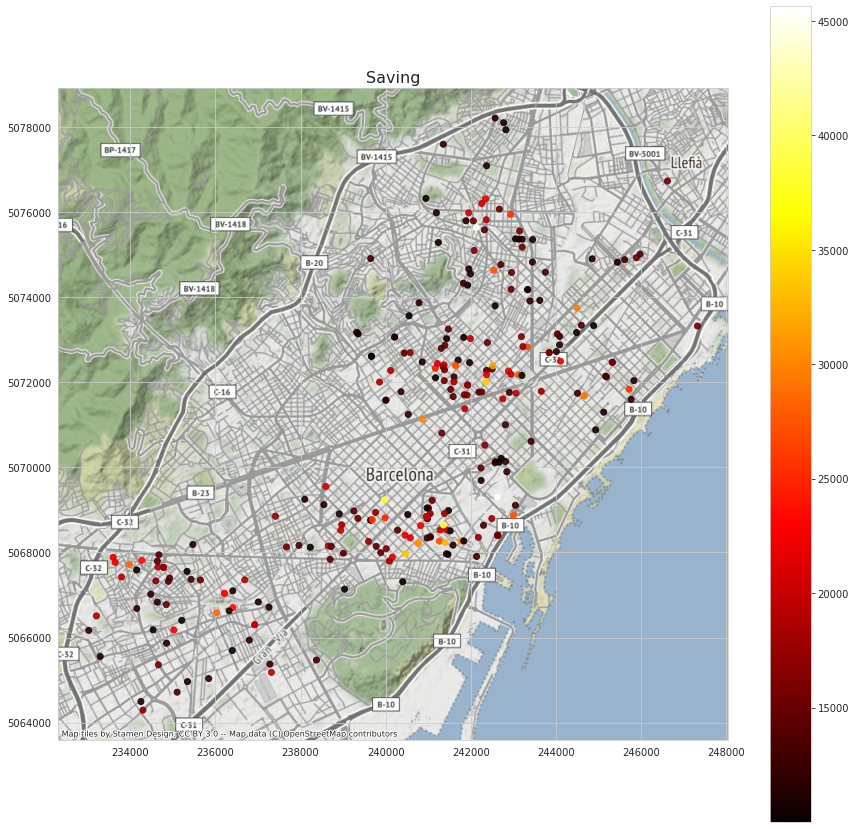

In [33]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = {'init': 'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)

figsize = (15,15)
fig, ax = plt.subplots(1, figsize=figsize)
gdf.plot(column='savings', cmap='hot',  legend=True, alpha=0.9, ax=ax)
ctx.add_basemap(ax)
ax.set_title("Saving", fontsize=16);

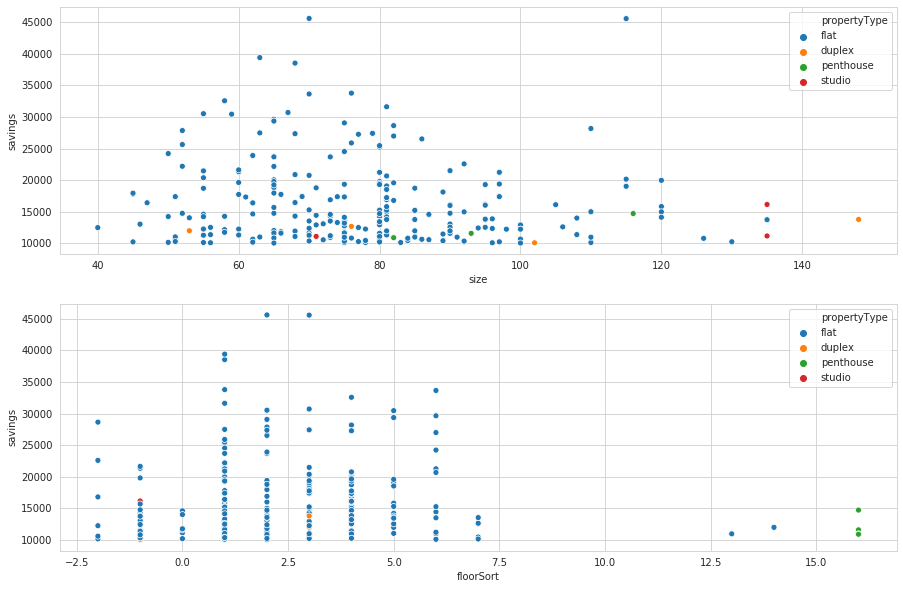

In [30]:
fig,ax= plt.subplots(2,figsize=(15, 10))
sns.scatterplot(x='size', y='savings', hue= 'propertyType', data=df,ax=ax[0])
sns.scatterplot(x='floorSort', y='savings', hue= 'propertyType', data=df,ax=ax[1])


In [31]:
type(gdf)

geopandas.geodataframe.GeoDataFrame